In [1]:
# rm(list=ls())
options(OutDec = ",") 
#===================================================================
# Equação de investimento.
# O modelo: 
# y = beta1 + beta2*T + beta3*G + epsilon.
#===================================================================
silence <- suppressPackageStartupMessages 
silence(library("Matrix"))
dados    <- matrix(scan("../dados/exemplo_07.txt"),15,5,byrow=T)
y        <- dados[,1]
n        <- length(y)
X        <- cbind(rep(1,n),dados[,2:3])
print(X)

      [,1] [,2]  [,3]
 [1,]    1    1 1,058
 [2,]    1    2 1,088
 [3,]    1    3 1,086
 [4,]    1    4 1,122
 [5,]    1    5 1,186
 [6,]    1    6 1,254
 [7,]    1    7 1,246
 [8,]    1    8 1,232
 [9,]    1    9 1,298
[10,]    1   10 1,370
[11,]    1   11 1,439
[12,]    1   12 1,479
[13,]    1   13 1,474
[14,]    1   14 1,503
[15,]    1   15 1,475


In [2]:
#===================================================================
# Verificando o posto da matriz X.
#===================================================================
print(rankMatrix(X)[1])

[1] 3


In [3]:
#===================================================================
# Posto da matriz XtX.
#===================================================================
XtX      <- t(X)%*%X
print(rankMatrix(XtX)[1])

[1] 3


In [4]:
#===================================================================
# Estimativa de mínimos quadrados.
#===================================================================
Xty      <- t(X)%*%y
XtXInv   <- solve(XtX)
betahat1 <- XtXInv%*%Xty
print(betahat1)

            [,1]
[1,] -0,50063897
[2,] -0,01719844
[3,]  0,65372331


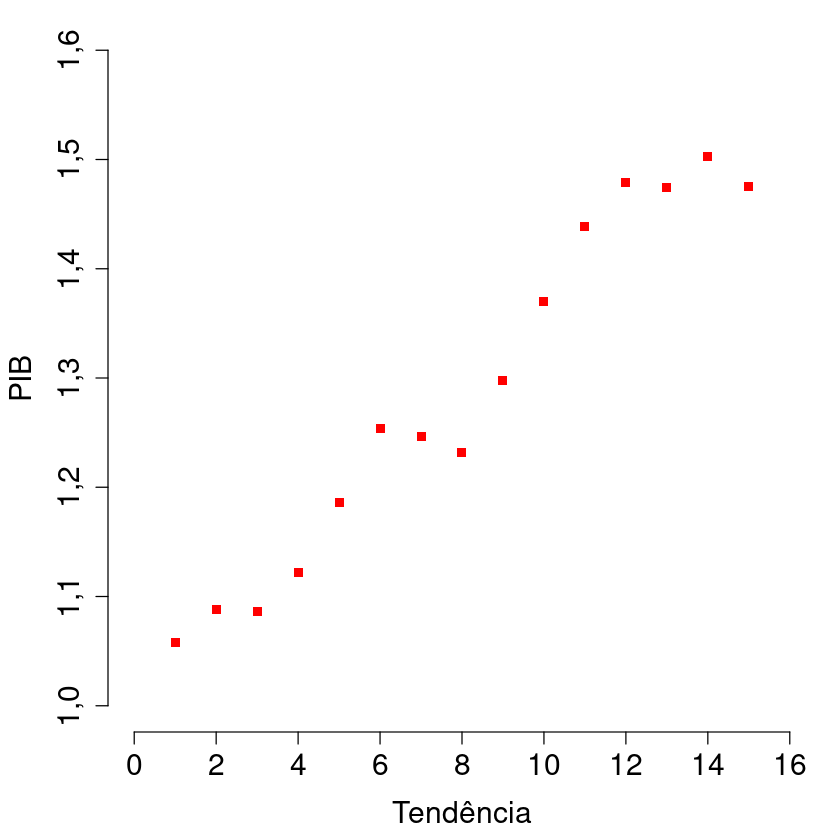

In [5]:
#===================================================================
# Analisando a tendência e o PIB.
#===================================================================
par(mfrow=c(1,1),lwd=2.0,cex.lab=1.5,cex.axis=1.5,lab=c(8,8,5),
    mar=c(4.5,4.5,1,1),cex.main=2.0,bty="n")
plot(X[,2],X[,3],pch=15,xlab="Tendência",ylab="PIB",col="red",
    xlim=c(0,16),ylim=c(1,1.6))    
# Com dados ordenados no tempo, pode haver possíveis problemas.

In [6]:
#==================================================================
# Agora, o modelo incluindo as covariáveis R e P. 
# y = beta0 + beta1*T + beta2*G + beta3*R + beta4*P + epsilon.
#===================================================================
X        <- cbind(rep(1,n),dados[,2:5])
#rankMatrix(X)
XtX      <- t(X)%*%X
Xty      <- t(X)%*%y
#rankMatrix(XtX)
XtXInv   <- solve(XtX)
betahat2 <- XtXInv%*%Xty
print(betahat2)

              [,1]
[1,] -0,5090707909
[2,] -0,0165803945
[3,]  0,6703834376
[4,] -0,0023259283
[5,] -0,0000940107


In [7]:
#===================================================================
# Comparando os coeficiente da primeira e da segunda regressões.
#===================================================================
print(betahat1)
print("=======================")
print(betahat2)

            [,1]
[1,] -0,50063897
[2,] -0,01719844
[3,]  0,65372331
[1] "======================="
              [,1]
[1,] -0,5090707909
[2,] -0,0165803945
[3,]  0,6703834376
[4,] -0,0023259283
[5,] -0,0000940107


In [8]:
#===================================================================
# Note que os coeficientes diferem de uma regressao para outra.
# Isto se deve ao fato das regressoras não serem ortogonais.
#===================================================================
print(cor(X[2:5,2:5]))

           [,1]       [,2]       [,3]       [,4]
[1,]  1,0000000  0,9125219 -0,9262413 -0,8183521
[2,]  0,9125219  1,0000000 -0,9293711 -0,9818378
[3,] -0,9262413 -0,9293711  1,0000000  0,8755363
[4,] -0,8183521 -0,9818378  0,8755363  1,0000000


In [9]:
#===================================================================
# Calculando os coeficientes de correlação parcial.
#===================================================================
# Correlação (simples) entre investimento e as demais covariáveis.
#===================================================================
cor.inv <- cor(dados)[1,2:5]
print(cor.inv)

[1] 0,7495873 0,8632077 0,5871350 0,4777117


In [10]:
#===================================================================
# Para salvar as correlações parciais.
#===================================================================
cor.par <- rep(NA,4)

In [11]:
#===================================================================
# Correlação parcial entre investimento e T.
#===================================================================
X          <- cbind(rep(1,n),dados[,3:5])
XtXInv     <- solve(t(X)%*%X)
M          <- diag(rep(1,n))- X%*%XtXInv%*%t(X)
res1       <- M%*%y 
res2       <- M%*%dados[,2]
cor.par[1] <- cor(res1,res2)

In [12]:
#===================================================================
# Correlação parcial entre investimento e G.
#===================================================================
X          <- cbind(rep(1,n),dados[,c(2,4,5)])
XtXInv     <- solve(t(X)%*%X)
M          <- diag(rep(1,n))- X%*%XtXInv%*%t(X)
res1       <- M%*%y 
res2       <- M%*%dados[,3]
cor.par[2] <- cor(res1,res2)

In [13]:
#===================================================================
# Correlação parcial entre investimento e R.
#===================================================================
X          <- cbind(rep(1,n),dados[,c(2,3,5)])
XtXInv     <- solve(t(X)%*%X)
M          <- diag(rep(1,n))- X%*%XtXInv%*%t(X)
res1       <- M%*%y 
res2       <- M%*%dados[,4]
cor.par[3] <- cor(res1,res2)

In [14]:
#===================================================================
# Correlação parcial entre investimento e P.
#===================================================================
X          <- cbind(rep(1,n),dados[,2:4])
XtXInv     <- solve(t(X)%*%X)
M          <- diag(rep(1,n))- X%*%XtXInv%*%t(X)
res1       <- M%*%y 
res2       <- M%*%dados[,5]
cor.par[4] <- cor(res1,res2)

In [15]:
#===================================================================
# Correlações parciais.
#===================================================================
print(cbind(cor.inv,cor.par))

       cor.inv     cor.par
[1,] 0,7495873 -0,93600197
[2,] 0,8632077  0,96795713
[3,] 0,5871350 -0,51666472
[4,] 0,4777117 -0,02205714


In [16]:
#===================================================================
# Calculando as somas de quadrados e o R^2 da regressão:
# y = beta0 + beta1*T + beta2*G + beta3*R + beta4*P + epsilon.
#===================================================================
n         <- length(y)
X         <- cbind(rep(1,n),dados[,2:5])
XtX       <- t(X)%*%X
Xty       <- t(X)%*%y
XtXInv    <- solve(XtX)
Mtilde    <- matrix(-1/n,n,n)
for(i in 1:n) 
    Mtilde[i,i] <- Mtilde[i,i] + 1
XtMtildeX <- t(X)%*%Mtilde%*%X
betahat   <- XtXInv%*%Xty
SQReg   <- t(betahat)%*%XtMtildeX%*%betahat
resid   <- y - X%*%betahat
SQRes   <- t(resid)%*%resid  # sum(resid^2)
SQTot   <- var(y)*(n-1)

In [17]:
#===================================================================
# Estimativa de mínimos quadrados.
#===================================================================
Xty      <- t(X)%*%y
XtXInv   <- solve(XtX)
betahat1 <- XtXInv%*%Xty
print(betahat)

              [,1]
[1,] -0,5090707909
[2,] -0,0165803945
[3,]  0,6703834376
[4,] -0,0023259283
[5,] -0,0000940107


In [18]:
#===================================================================
# Somas de quadrados.
#===================================================================
print(c(SQReg)) #  4 graus de liberdade
print(c(SQRes)) # 10 graus de liberdade
print(c(SQTot)) # 14 graus de liberdade

[1] 0,01590252
[1] 0,0004508118
[1] 0,01635333


In [19]:
#===================================================================
# Calculando as somas de quadrados e o R^2 da regressão:
# y = beta0 + beta1*T + beta2*G + beta3*R + beta4*P + epsilon.
# Utilizando como alternativa as funções lm e anova.
#===================================================================
# Observe as diferenças entre as duas formas abaixo.
#===================================================================
options(decimals=10,digits=10)

#===================================================================
# A função lsfit faz ajuste de mínimos quadrados.
# Mas recomenda-se o uso da função lm por ser mais completa.
# A função lm será utilizada a partir daqui para ajuste de mínimos 
# quadrados de regressão linear múltipla.
#===================================================================
# Primeira forma.
#===================================================================
yfit1   <- lm(y ~ X[,2:5])
print(summary(yfit1))
print(anova(yfit1))


Call:
lm(formula = y ~ X[, 2:5])

Residuals:
          Min            1Q        Median            3Q           Max 
-0,0102778515 -0,0022946023  0,0004118672  0,0029377204  0,0080417956 

Coefficients:
                 Estimate    Std. Error  t value   Pr(>|t|)    
(Intercept) -0,5090707909  0,0551276899 -9,23439 3,2821e-06 ***
X[, 2:5]1   -0,0165803945  0,0019717611 -8,40893 7,5891e-06 ***
X[, 2:5]2    0,6703834376  0,0549972149 12,18941 2,5210e-07 ***
X[, 2:5]3   -0,0023259283  0,0012188677 -1,90827   0,085449 .  
X[, 2:5]4   -0,0000940107  0,0013474804 -0,06977   0,945754    
---
Signif. codes:  0 ‘***’ 0,001 ‘**’ 0,01 ‘*’ 0,05 ‘.’ 0,1 ‘ ’ 1

Residual standard error: 0,006714252 on 10 degrees of freedom
Multiple R-squared:  0,972433,	Adjusted R-squared:  0,9614062 
F-statistic: 88,18825 on 4 and 10 DF,  p-value: 9,332607e-08

Analysis of Variance Table

Response: y
          Df       Sum Sq      Mean Sq  F value     Pr(>F)    
X[, 2:5]   4 0,0159025215 0,0039756304 88,18825 9,3326e

In [20]:
#===================================================================
# Segunda forma.
#===================================================================
yfit2   <- lm(y ~ X[,2]+X[,3]+X[,4]+X[,5])
print(summary(yfit2))
print(anova(yfit2))


Call:
lm(formula = y ~ X[, 2] + X[, 3] + X[, 4] + X[, 5])

Residuals:
          Min            1Q        Median            3Q           Max 
-0,0102778515 -0,0022946023  0,0004118672  0,0029377204  0,0080417956 

Coefficients:
                 Estimate    Std. Error  t value   Pr(>|t|)    
(Intercept) -0,5090707909  0,0551276899 -9,23439 3,2821e-06 ***
X[, 2]      -0,0165803945  0,0019717611 -8,40893 7,5891e-06 ***
X[, 3]       0,6703834376  0,0549972149 12,18941 2,5210e-07 ***
X[, 4]      -0,0023259283  0,0012188677 -1,90827   0,085449 .  
X[, 5]      -0,0000940107  0,0013474804 -0,06977   0,945754    
---
Signif. codes:  0 ‘***’ 0,001 ‘**’ 0,01 ‘*’ 0,05 ‘.’ 0,1 ‘ ’ 1

Residual standard error: 0,006714252 on 10 degrees of freedom
Multiple R-squared:  0,972433,	Adjusted R-squared:  0,9614062 
F-statistic: 88,18825 on 4 and 10 DF,  p-value: 9,332607e-08

Analysis of Variance Table

Response: y
          Df       Sum Sq      Mean Sq   F value     Pr(>F)    
X[, 2]     1 0,0091886286 0,0

In [21]:
#===================================================================
# Fim
#===================================================================